In [17]:
%%time
import sys, os
year = '2023'
path_gen = '/home/eliasmfs/Erasmus MC/Projects/Cerebellar_Open_Closed_Loops'
path_data = f'/mnt/User_Data/UserData/eliasmfs/Cerebellar_Open_Closed_Loops/SlowData/'
path_code = f'{path_gen}'
path_functions = f'{path_code}/Functions'
sys.path.append(path_data)
sys.path.append(path_functions)
from General_functions import *
from Input import *
from Neurons import *
from Synapses import *
import decimal

N_Cells_PF = 10
N_Cells_PC_range = [200]
N_Cells_DCN = 40
N_Cells_IO = 40
N_Cells_PF_OU = 10
N_Cells_PF_events = 0
N_PC_DCN_converge = 40
N_PC_DCN_project = 16
N_IO_project = 5
IO_Conn_ratio = 2
Input_save = True
Synapses = True
exp_run_range = [120000]*ms

sigma_arr = zeros(N_Cells_PF_OU)
sigma_arr[0:10] = 0.25
tau_noise_arr = zeros(N_Cells_PF_OU)
tau_noise_arr[0:5] = 50
tau_noise_arr[5:10] = 100


num_networks = ['closed_open_loops_diff_tau']
sims = ['eye_blink','pulse','eye_blink_open','pulse_open'] 
for N_Cells_PC in N_Cells_PC_range:
    for exp_run in exp_run_range:
        width = exp_run/40
        for net_num in num_networks: 
            PC_intrinsic = 0.15
            DCN_intrinsic = 1.75
            A_w = 0.22
            if N_Cells_PF_OU == 5:
                f0_range = []
            else: 
                f0_range = []
            Parameters = {"dt": 0.025*ms, "dt_rec": 1.0*ms, "tau_noise": 50*ms, "width": width, "net_num" : net_num,
            "exp_run": exp_run, "N_Cells_PF": N_Cells_PF, "N_Cells_PC": N_Cells_PC, "N_Cells_DCN": N_Cells_DCN,
            "N_Cells_PF_OU": N_Cells_PF_OU, "N_Cells_PF_events": N_Cells_PF_events, "N_Cells_IO": N_Cells_IO, 
            "N_Copy": N_Cells_PF*N_Cells_PC, "N_Copy_order": list(range(0, N_Cells_PF*N_Cells_PC)),
            "N_PC_DCN_converge" : N_PC_DCN_converge, "N_IO_project": N_IO_project, "N_PC_DCN_project" : N_PC_DCN_project,
            "IO_Conn_ratio": IO_Conn_ratio,  "eqs_syn_IO_PC_pre": f'w +=({A_w}*nA); try_new_bcm += 100*Hz', 
            "path_data": path_data, "PC_I_intrinsic": PC_intrinsic, "DCN_I_intrinsic": DCN_intrinsic, "f0_range": f0_range, 
            "filter_order": 6, "Synapses" : Synapses, "PC_variablity": 0.5, "DCN_variablity": 0.15, "I_0_Noise": 1.3,
            "sigma_Noise":0.25, "simulations": sims, "CS_pulse_amplitude": 1.5, "CS_pulse_duration": 250*ms, 
            "US_pulse_amplitude": 1.5, "US_pulse_duration": 30*ms, "interpulse_duration": 10*second, 
            "sigma_arr": sigma_arr, "tau_noise_arr": tau_noise_arr,
            "Record": {'Input': True, 'Noise': True, 'PC': True, 'DCN': True, 'IO': True, 'conn_N_PC': True, 
                       'Input_presyn': True}}
            if N_Cells_PF_events > 0: 
                interpulse_duration = 2
                if N_Cells_PF_events == 2: interpulse_duration = 6
                Parameters["CS_pulse_amplitude"] = CS_amp
                Parameters["CS_pulse_duration"] = 250*ms
                Parameters["US_pulse_amplitude"] = US_amp
                Parameters["US_pulse_duration"] = 30*ms
                Parameters["interpulse_duration"] = interpulse_duration*second    
            Input = Input_func(Parameters)

eye_blink
pulse
eye_blink_open
pulse_open
Saved closed_open_loops_diff_tau
CPU times: user 1min 14s, sys: 3.77 s, total: 1min 17s
Wall time: 1min 35s


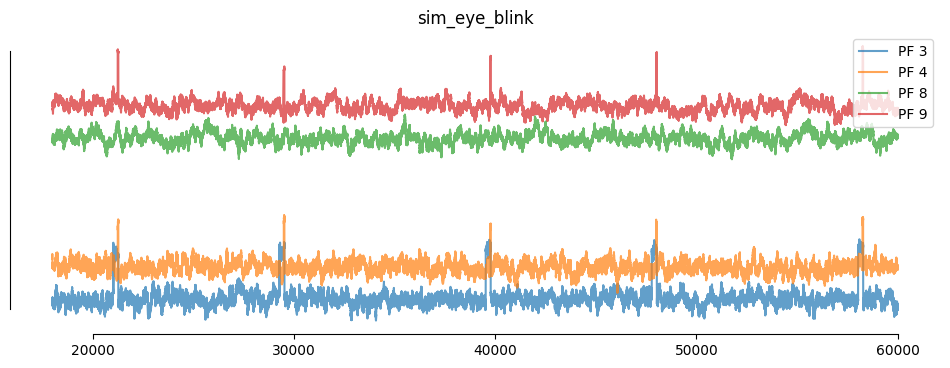

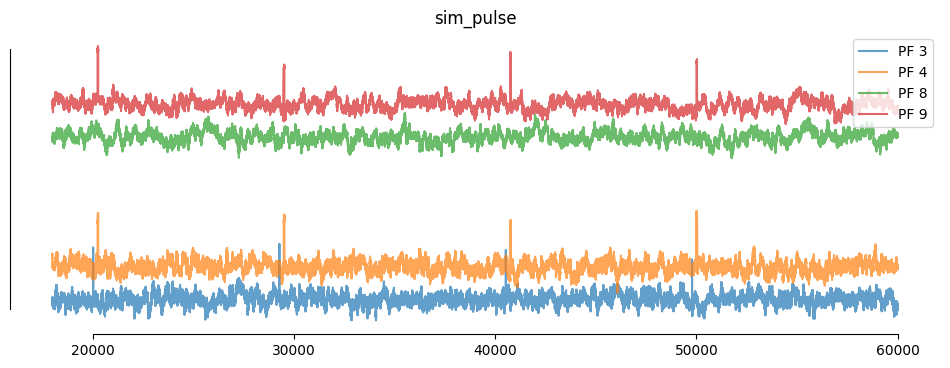

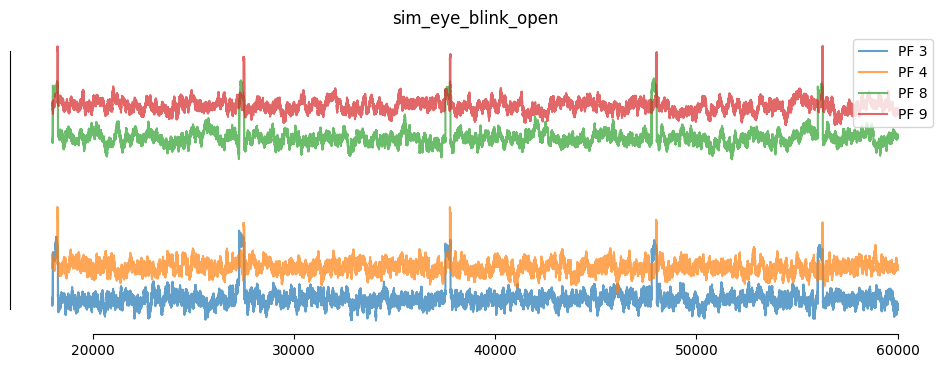

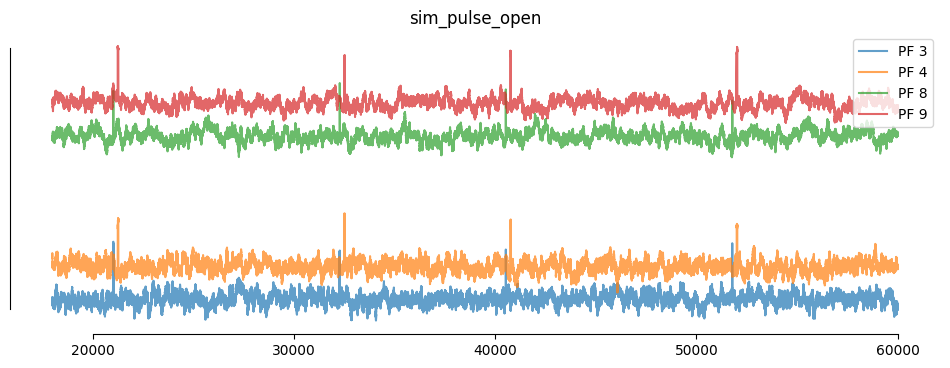

In [29]:
from General_functions import *
from Input import *
from Neurons import *
from Synapses import *
import decimal

seed_number = num_networks[0]
exp_run = exp_run_range[0]/ms

N_Cells_PC = 200

frozen_path = path_data + f'Frozen/Networks/{N_Cells_PC}PC_40DCN_40IO/Seed_{seed_number}/{int(exp_run)}ms/Frozen_{int(exp_run)}ms_{N_Cells_PC}PC_40DCN_40IO_Seed_{seed_number}.mat'
Frozen_data = sio.loadmat(frozen_path, squeeze_me=True)

Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)

start = int(18000*40)
end = int(60000*40)
x_ax = linspace(int(start/40),int(end/40),int(end-start))
for sim in Parameters['simulations']:
    fig = plt.figure(figsize=(12, 4),dpi=100)
    title(f'sim_{sim}')
    y_ax = Noise_frozen.Noise_sim[f'sim_{sim}']
    for N_Noise in [3,4,8,9]:
        plot(x_ax,N_Noise+2+y_ax[N_Noise][start:end]/nA*amp,label=f'PF {N_Noise}',alpha=0.7)
    sns.despine(trim=True)
    yticks([])
    legend(loc='upper right')
    plt.show()

[48 47 41 42 39 43 45 39 36 42 31 37 42 38 36 40 48 44 37 39 38 41 46 42
 35 38 41 37 43 41 39 34 37 41 38 38 42 35 37 43]
mean: 40.0


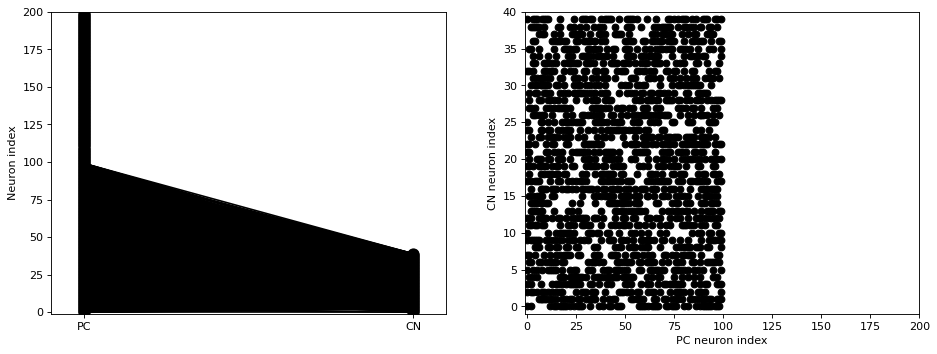

In [4]:
from General_functions import *
from Input import *
from Neurons import *
from Synapses import *
import decimal

seed_number = num_networks[0]
exp_run = exp_run_range[0]/ms

N_Cells_PC = 200

frozen_path = path_data + f'Frozen/Networks/{N_Cells_PC}PC_40DCN_40IO/Seed_{seed_number}/{int(exp_run)}ms/Frozen_{int(exp_run)}ms_{N_Cells_PC}PC_40DCN_40IO_Seed_{seed_number}.mat'
Frozen_data = sio.loadmat(frozen_path, squeeze_me=True)

Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)

N_PCs_per_DCN = np.zeros(N_Cells_DCN, dtype=int) # create an array to store the number of source PCs for each DCN
for DCN_num in range(N_Cells_DCN):
    sources = np.where(Synaps.PC_DCN_Synapse_Targets == DCN_num)[0] # find the source PCs that project to this DCN
    N_PCs_per_DCN[DCN_num] = len(sources) # count the number of source PCs


print(N_PCs_per_DCN)
print(f'mean: {mean(N_PCs_per_DCN)}')


Ns = N_Cells_PC
Nt = N_Cells_DCN
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.PC_DCN_Synapse_Sources, Synaps.PC_DCN_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['PC', 'CN'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.PC_DCN_Synapse_Sources, Synaps.PC_DCN_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('PC neuron index');
ylabel('CN neuron index');

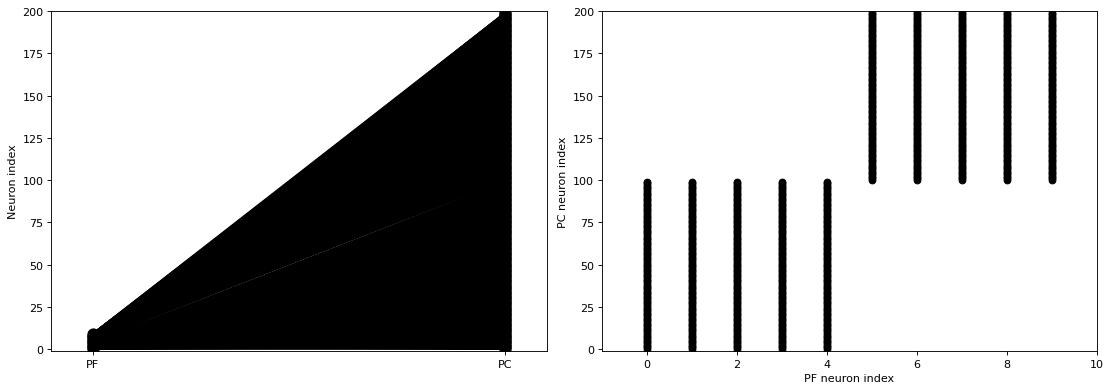

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Ns = N_Cells_PF
Nt = N_Cells_PC

# Assuming Synaps.Noise_PC_Synapse_Sources, Synaps.Noise_PC_Synapse_Targets, and Synaps.Noise_PC_Synapse_Weights are available

# Filter connections where weight is not zero
non_zero_connections = np.array(Synaps.Noise_PC_Synapse_Weights) != 0
filtered_sources = np.array(Synaps.Noise_PC_Synapse_Sources)[non_zero_connections]
filtered_targets = np.array(Synaps.Noise_PC_Synapse_Targets)[non_zero_connections]

plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

# First subplot: Connectivity diagram
plt.subplot(121)
plt.plot(np.zeros(Ns), np.arange(Ns), 'ok', ms=10)  # PF neurons
plt.plot(np.ones(Nt), np.arange(Nt), 'ok', ms=10)   # PC neurons
for i, j in zip(filtered_sources, filtered_targets):
    plt.plot([0, 1], [i, j], '-k')
plt.xticks([0, 1], ['PF', 'PC'])
plt.ylabel('Neuron index')
plt.xlim(-0.1, 1.1)
plt.ylim(-1, max(Ns, Nt))

# Second subplot: Connectivity matrix
plt.subplot(122)
plt.plot(filtered_sources, filtered_targets, 'ok')
plt.xlim(-1, Ns)
plt.ylim(-1, Nt)
plt.xlabel('PF neuron index')
plt.ylabel('PC neuron index')

plt.tight_layout()
plt.show()

num DCNs projecting to each IO [11  8 14 10 11  7  6  9 10  7 11 11  9 12 11  8 11  8 12 10  7 10  6 12
  9 10  7  9 10 14 12 13  6  6 13 11 11 11 10 17]
mean: 10.0
num IOs each DCN projects onto [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
mean: 10.0


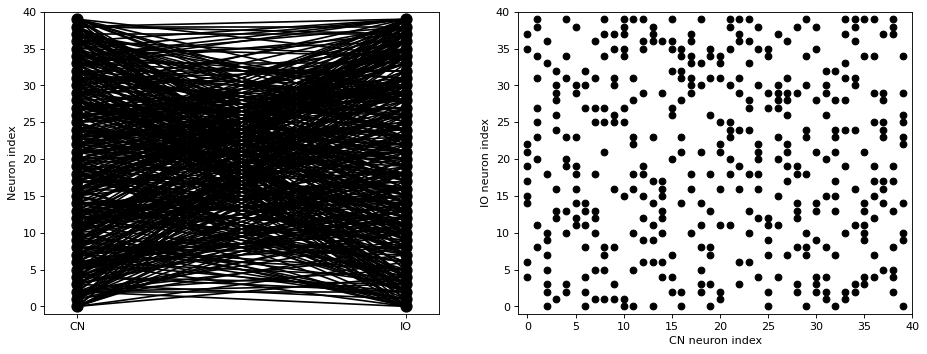

In [6]:
N_DCNs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.DCN_IO_Synapse_Targets == IO_num)[0] # find the source PCs that project to this DCN
    N_DCNs_per_IO[IO_num] = len(sources) # count the number of source PCs


print(f'num DCNs projecting to each IO {N_DCNs_per_IO}')
print(f'mean: {mean(N_DCNs_per_IO)}')

N_IOs_per_DCN_avg = []
N_IOs_per_DCN = np.zeros(N_Cells_DCN, dtype=int) # create an array to store the number of source PCs for each DCN
for DCN_num in range(N_Cells_DCN):
    sources = np.where(Synaps.DCN_IO_Synapse_Sources == DCN_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_DCN[DCN_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_DCN_avg.append(len(sources))

print(f'num IOs each DCN projects onto {N_IOs_per_DCN}')
print(f'mean: {mean(N_IOs_per_DCN_avg)}')


Ns = N_Cells_DCN
Nt = N_Cells_IO
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['CN', 'IO'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('CN neuron index');
ylabel('IO neuron index');

In [7]:
Synaps.IO_PC_Synapse_Sources

array([ 6, 12, 14, 37, 16,  2, 18, 33, 11, 10, 28, 30, 17,  8, 35,  3, 27,
       29, 22, 39, 16, 28, 10, 35, 29,  8, 33,  2, 37, 14, 18, 22, 11, 11,
        6, 30, 12,  3, 39, 16,  6, 14,  2, 14, 29, 39,  8, 12, 30, 14,  3,
        6,  8, 16, 30, 29, 16, 17,  3, 11, 29, 22, 12, 12,  3, 12, 10, 22,
       18, 30, 28, 11,  8, 11, 30, 10, 33, 14, 16, 29,  3, 30, 28, 30, 16,
       27, 14, 30,  3, 10, 10, 28, 17,  6, 30, 29, 22,  6, 10, 12,  6, 12,
       14, 37, 16,  2, 18, 33, 11, 10, 28, 30, 17,  8, 35,  3, 27, 29, 22,
       39, 16, 28, 10, 35, 29,  8, 33,  2, 37, 14, 18, 22, 11, 11,  6, 30,
       12,  3, 39, 16,  6, 14,  2, 14, 29, 39,  8, 12, 30, 14,  3,  6,  8,
       16, 30, 29, 16, 17,  3, 11, 29, 22, 12, 12,  3, 12, 10, 22, 18, 30,
       28, 11,  8, 11, 30, 10, 33, 14, 16, 29,  3, 30, 28, 30, 16, 27, 14,
       30,  3, 10, 10, 28, 17,  6, 30, 29, 22,  6, 10, 12])

num PCs receiving from each IO [ 0  0  6 14  0  0 12  0 10  0 14 12 14  0 14  0 14  6  6  0  0  0 10  0
  0  0  0  4 10 14 20  0  0  6  0  4  0  4  0  6]
mean: 10.0
num IOs projecting onto each PC [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
mean: 1.0


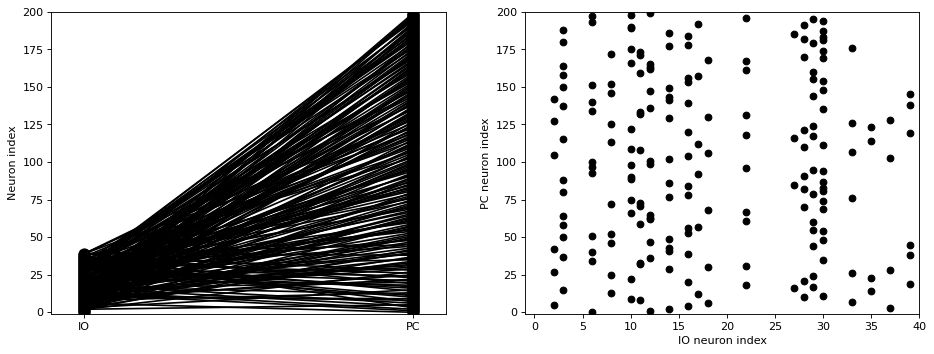

In [8]:
Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)
N_PCs_per_IO_avg = []
N_PCs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.IO_PC_Synapse_Sources == IO_num)[0] # find the source PCs that project to this DCN
    N_PCs_per_IO[IO_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_PCs_per_IO_avg.append(len(sources))

print(f'num PCs receiving from each IO {N_PCs_per_IO}')
print(f'mean: {mean(N_PCs_per_IO_avg)}')

N_IOs_per_PC_avg = []
N_IOs_per_PC = np.zeros(N_Cells_PC, dtype=int) # create an array to store the number of source PCs for each DCN
for PC_num in range(N_Cells_PC):
    sources = np.where(Synaps.IO_PC_Synapse_Targets == PC_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_PC[PC_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_PC_avg.append(len(sources))

print(f'num IOs projecting onto each PC {N_IOs_per_PC}')
print(f'mean: {mean(N_IOs_per_PC_avg)}')

Ns = N_Cells_IO
Nt = N_Cells_PC
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.IO_PC_Synapse_Sources, Synaps.IO_PC_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['IO', 'PC'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.IO_PC_Synapse_Sources, Synaps.IO_PC_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('IO neuron index');
ylabel('PC neuron index');

num IO receiving from each IO [ 7 13 10 12 12  8  7  9  8 16 15  9  8 14  8  7  7 11 11 10  7 13 12  9
  8 12 11 12 14 11  8  6  9  9  9  7 10  8 11 12]
mean: 10.0
num IOs projecting onto each IO [ 7 13 10 12 12  8  7  9  8 16 15  9  8 14  8  7  7 11 11 10  7 13 12  9
  8 12 11 12 14 11  8  6  9  9  9  7 10  8 11 12]
mean: 10.0


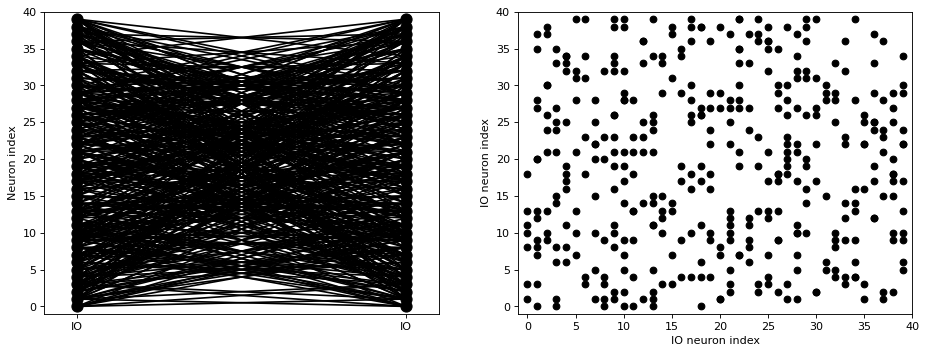

In [9]:
Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)
N_IOs_per_IO_avg = []
N_IOs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.IO_Synapse_Sources == IO_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_IO[IO_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_IO_avg.append(len(sources))

print(f'num IO receiving from each IO {N_IOs_per_IO}')
print(f'mean: {mean(N_IOs_per_IO_avg)}')

N_IOs_per_IO_avg = []
N_IOs_per_IO = np.zeros(N_Cells_IO, dtype=int) # create an array to store the number of source PCs for each DCN
for IO_num in range(N_Cells_IO):
    sources = np.where(Synaps.IO_Synapse_Targets == IO_num)[0] # find the source PCs that project to this DCN
    N_IOs_per_IO[IO_num] = len(sources) # count the number of source PCs
    if len(sources) > 0:
        N_IOs_per_IO_avg.append(len(sources))

print(f'num IOs projecting onto each IO {N_IOs_per_IO}')
print(f'mean: {mean(N_IOs_per_IO_avg)}')

Ns = N_Cells_IO
Nt = N_Cells_IO
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.IO_Synapse_Sources, Synaps.IO_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['IO', 'IO'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.IO_Synapse_Sources, Synaps.IO_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('IO neuron index');
ylabel('IO neuron index');

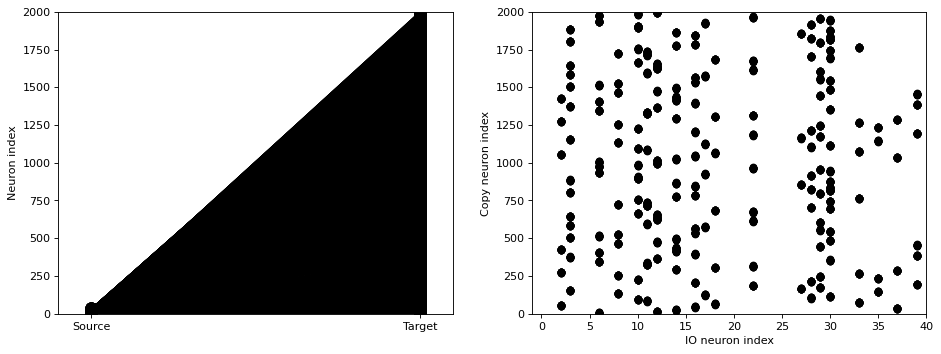

In [10]:
Ns = N_Cells_IO
Nt = Params.N_Copy
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.IO_Copy_Synapse_Sources, Params.N_Copy_order):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.IO_Copy_Synapse_Sources, Params.N_Copy_order, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('IO neuron index');
ylabel('Copy neuron index');

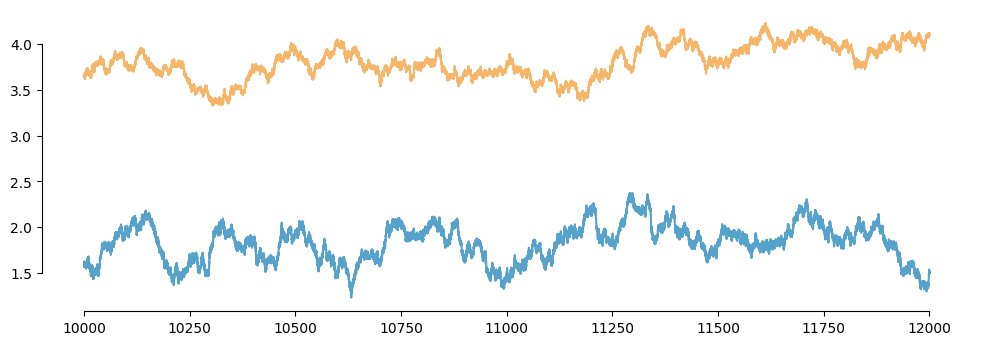

In [28]:
color_arr = ['#0e7ab5b2','#f2972ab2']

start = int(10000*40)
end = int(12000*40)
x_ax = linspace(int(start/40),int(end/40),int(end-start))
fig = plt.figure(figsize=(12, 4),dpi=100)
ii = 0
for N_Noise in [1,5]:#range(N_Cells_PF):
    y_ax = Noise_frozen.Noise_I+N_Noise/2*10e-10
    plot(x_ax,y_ax[N_Noise][start:end]/nA*amp,color_arr[ii],label=f'PF {N_Noise}')
    ii+=1
sns.despine(trim=True)
# yticks([])
# legend(loc='upper right')
plt.show()

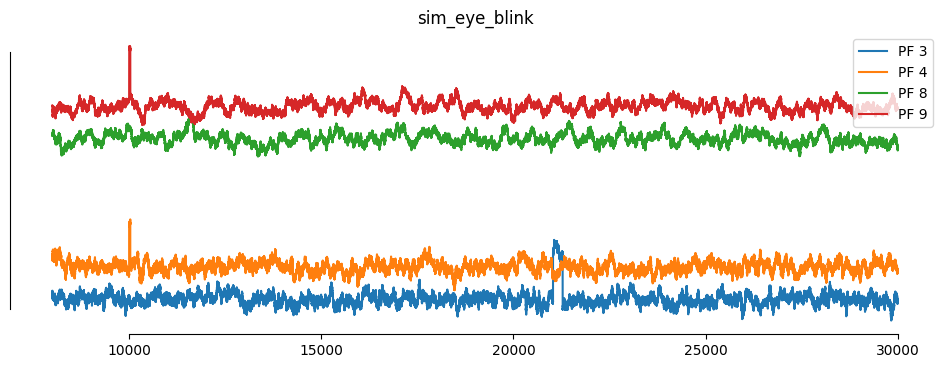

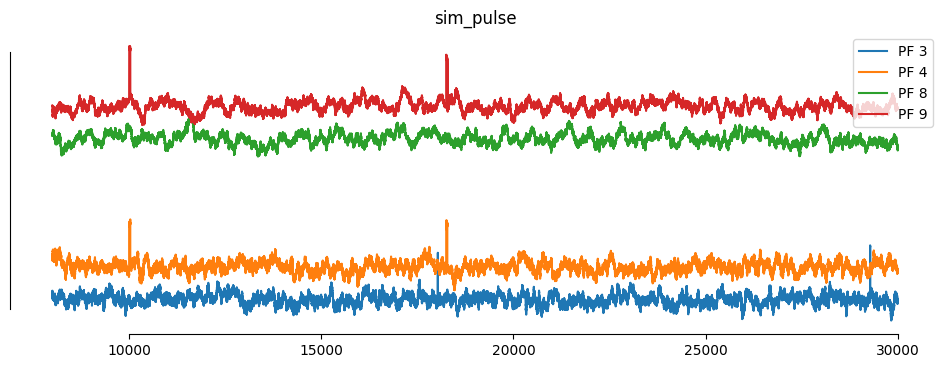

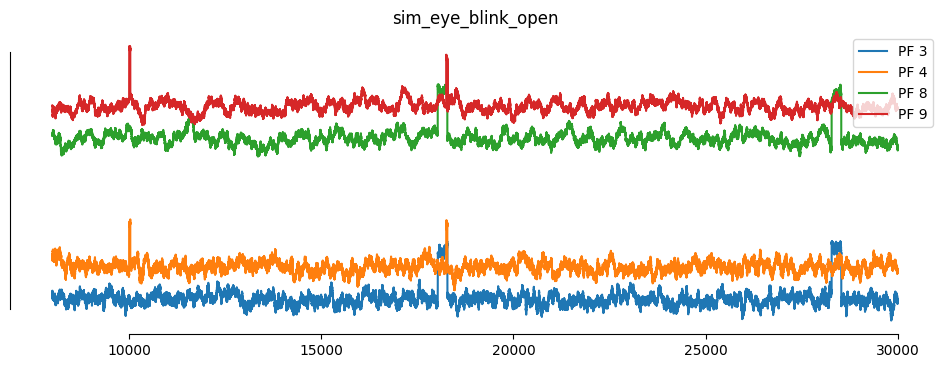

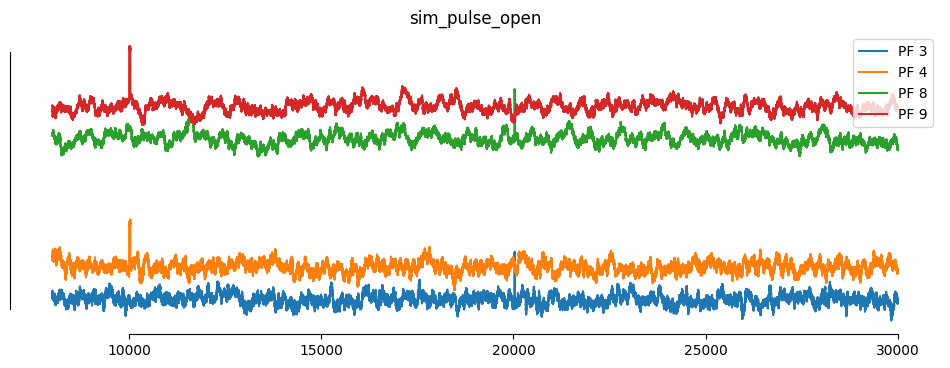

In [12]:
start = int(8000*40)
end = int(30000*40)
x_ax = linspace(int(start/40),int(end/40),int(end-start))
for sim in Parameters['simulations']:
    fig = plt.figure(figsize=(12, 4),dpi=100)
    title(f'sim_{sim}')
    y_ax = Noise_frozen.Noise_sim[f'sim_{sim}']
    for N_Noise in [3,4,8,9]:
        plot(x_ax,N_Noise+y_ax[N_Noise][start:end]/nA*amp,label=f'PF {N_Noise}')
    sns.despine(trim=True)
    yticks([])
    legend(loc='upper right')
    plt.show()

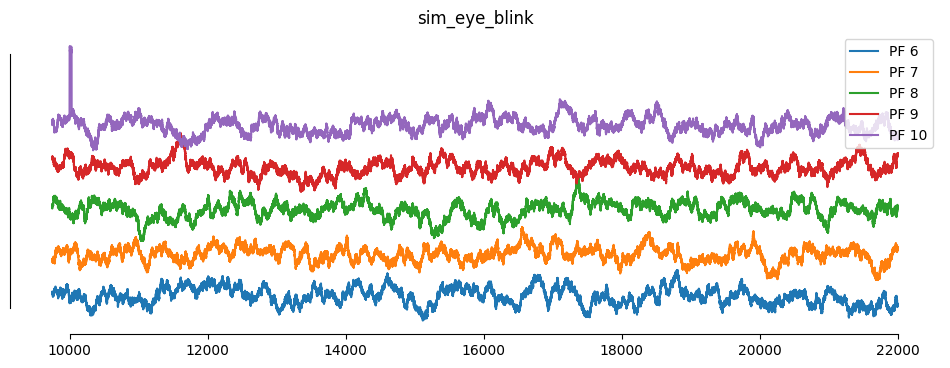

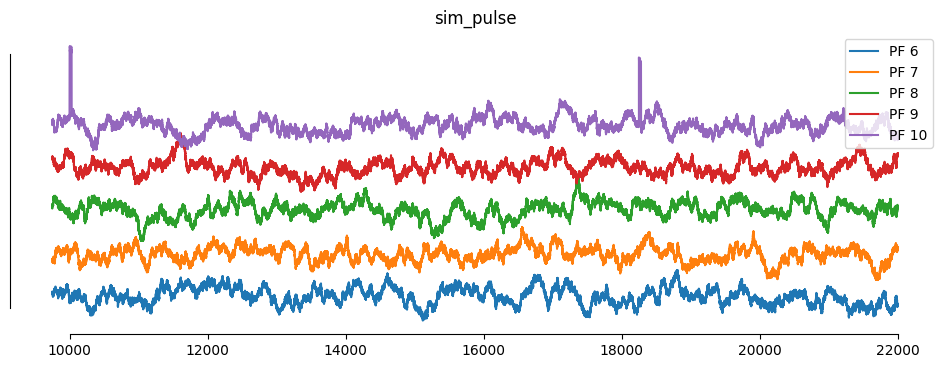

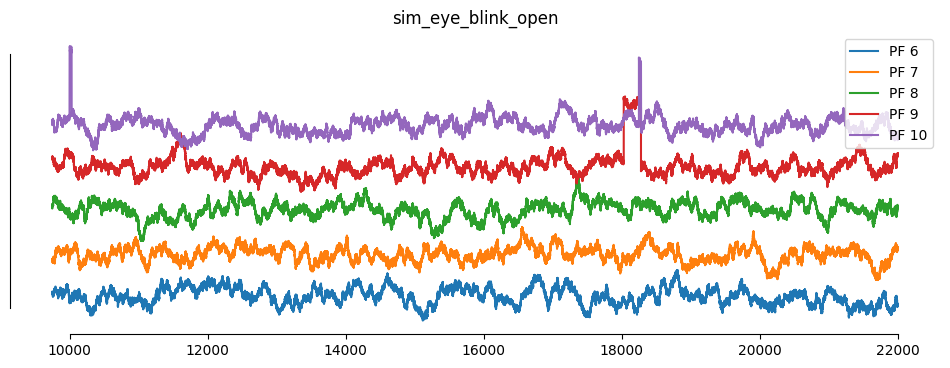

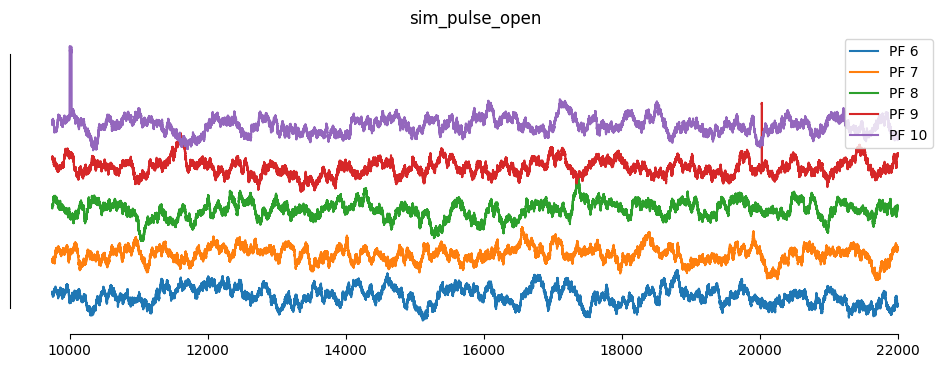

In [13]:
start = int(9750*40)
end = int(22000*40)
x_ax = linspace(int(start/40),int(end/40),int(end-start))
for sim in Parameters['simulations']:
    fig = plt.figure(figsize=(12, 4),dpi=100)
    title(f'sim_{sim}')
    y_ax = Noise_frozen.Noise_sim[f'sim_{sim}']
    for N_Noise in range(5,10):
        plot(x_ax,N_Noise+y_ax[N_Noise][start:end]/nA*amp,label=f'PF {N_Noise+1}')
    sns.despine(trim=True)
    yticks([])
    legend(loc='upper right')
    plt.show()

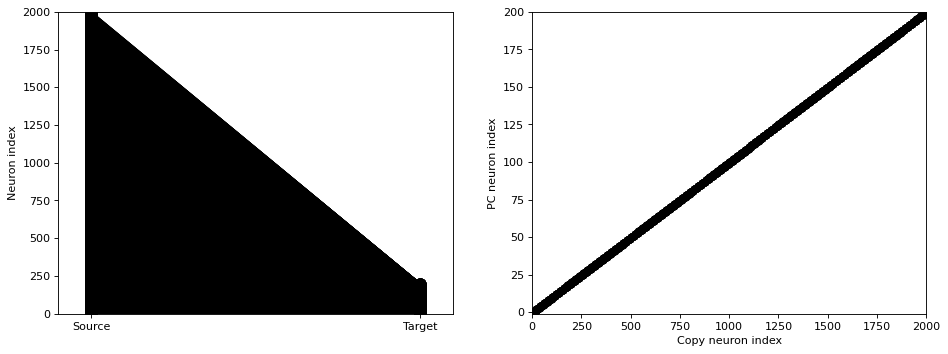

In [14]:
Ns = Params.N_Copy
Nt = N_Cells_PC
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('Copy neuron index');
ylabel('PC neuron index');

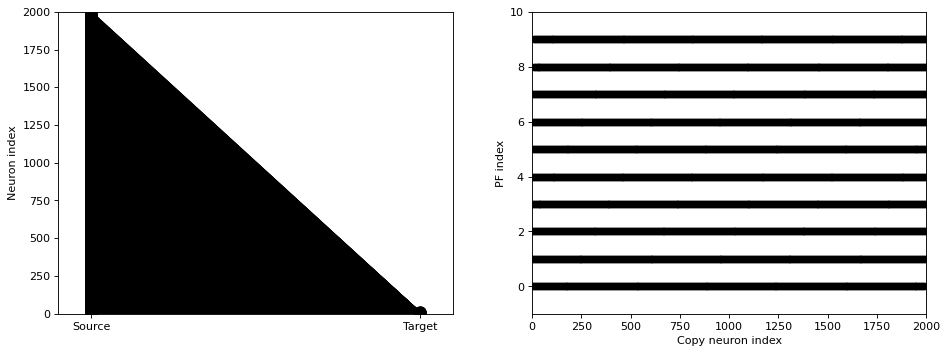

In [15]:
Ns = Params.N_Copy
Nt = N_Cells_PF
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Sources):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Params.N_Copy_order, Synaps.Noise_PC_Synapse_Sources, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('Copy neuron index');
ylabel('PF index');

[11  8 14 10 11  7  6  9 10  7 11 11  9 12 11  8 11  8 12 10  7 10  6 12
  9 10  7  9 10 14 12 13  6  6 13 11 11 11 10 17]
mean: 10.0


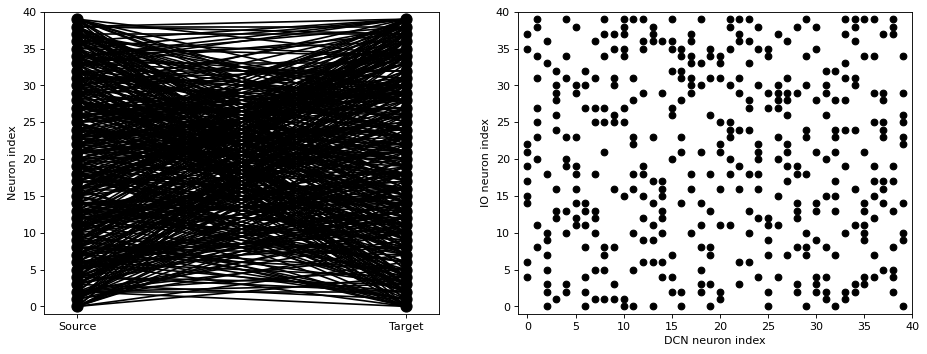

In [16]:
seed_number = num_networks[0]
exp_run = exp_run_range[0]/ms
frozen_path = path_data + f'Frozen/Networks/{N_Cells_PC}PC_40DCN_40IO/Seed_{seed_number}/{int(exp_run)}ms/Frozen_{int(exp_run)}ms_{N_Cells_PC}PC_40DCN_40IO_Seed_{seed_number}.mat'
Frozen_data = sio.loadmat(frozen_path, squeeze_me=True)

Params, Noise_frozen, Values, Synaps = Read_Input(Frozen_data)
N_PCs_per_DCN = np.zeros(N_Cells_DCN, dtype=int) # create an array to store the number of source PCs for each DCN
for DCN_num in range(N_Cells_DCN):
    sources = np.where(Synaps.DCN_IO_Synapse_Targets == DCN_num)[0] # find the source PCs that project to this DCN
    N_PCs_per_DCN[DCN_num] = len(sources) # count the number of source PCs


print(N_PCs_per_DCN)
print(f'mean: {mean(N_PCs_per_DCN)}')

Ns = N_Cells_DCN
Nt = N_Cells_IO
figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')
subplot(121)
plot(zeros(Ns), arange(Ns), 'ok', ms=10)
plot(ones(Nt), arange(Nt), 'ok', ms=10)
for i, j in zip(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets):
    plot([0, 1], [i, j], '-k')
xticks([0, 1], ['Source', 'Target'])
ylabel('Neuron index')
xlim(-0.1, 1.1)
ylim(-1, max(Ns, Nt))
subplot(122)
plot(Synaps.DCN_IO_Synapse_Sources, Synaps.DCN_IO_Synapse_Targets, 'ok')
xlim(-1, Ns)
ylim(-1, Nt)
xlabel('DCN neuron index');
ylabel('IO neuron index');

In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt
x_ax = linspace(0,int(Params.exp_run),int(Params.exp_run/Params.dt/second))
fs = 1/(Params.dt/second)
T = Params.exp_run/second
nsamples = int(T * fs)
x_ax_fr = rfftfreq(nsamples, 1 / fs)
f0_range = [5,10,15,20,25,50,100]
ymax=10000
f0_range.insert(0,0)
fig, axes = plt.subplots(nrows=len(f0_range), ncols=3, figsize=(15, 20),dpi=100, sharey='col', sharex='col')
energ_x = {}
for row,f0 in enumerate(f0_range):
    step = 5
    if f0 >= 50:
        step = 25
    if f0 >= 100:
        step = 50
        
    if f0 == 0:
        y_ax = Noise_frozen.Noise_I
        name = 'Unfiltered'
    else:
        y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
        name =f'Filtered {f0}-{f0+step}'
        axes[row,2].vlines(f0, -ymax, ymax, colors='r', linestyles='--')
        axes[row,2].vlines(f0+step, -ymax, ymax, colors='r', linestyles='--')
        
    if row == 0:
        axes[row,0].set_title(f'Signal (current) time domain \n {name}')
        axes[row,1].set_title(f'Power spectral density of signal \n {name}')
        axes[row,2].set_title(f'Frequency domain \n {name}')   
    else:
        axes[row,0].set_title(f'{name}')
        axes[row,1].set_title(f'{name}')
        axes[row,2].set_title(f'{name}')
        
    energ_x[f'{f0}'] = []
    for N_Noise in range(5):
        energ_x[f'{f0}'].append(round(sum(np.abs(rfft(y_ax[N_Noise]/nA))**2)/10e11,2))
        axes[row,0].plot(x_ax,y_ax[N_Noise]/nA)
        f, Pxx_den = signal.periodogram(y_ax[N_Noise]/nA, fs, scaling='density')
        name_pct = f'PF {N_Noise+1}'
        if f0 != 0:
            pct = round(energ_x['0'][N_Noise]/energ_x[f'{f0}'][N_Noise],3)
            name_pct = f'PF {N_Noise+1}: {pct*100}%'
        axes[row,1].semilogy(f, Pxx_den,label=name_pct)
        axes[row,1].legend(loc="lower left")
        axes[row,2].plot(x_ax_fr,rfft(y_ax[N_Noise]/nA))
    axes[row,2].set_xscale('log')
    axes[row,2].set_ylim([0,ymax])
    if row != len(f0_range)-1:
        axes[row,0].tick_params(bottom=False)
        axes[row,1].tick_params(bottom=False)
        axes[row,2].tick_params(bottom=False)
        axes[row,0].set_ylabel('I [nA]')
        axes[row,1].set_ylabel('PSD [-]')
        axes[row,2].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row,0])
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row,1])
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row,2])
    else:
        sns.despine(trim=True,ax=axes[row,0])
        sns.despine(trim=True,ax=axes[row,1])
        sns.despine(trim=True,ax=axes[row,2])
        axes[row,0].set_xlabel('Time [s]')
        axes[row,1].set_xlabel('Frequency [Hz]') 
        axes[row,2].set_xlabel('Frequency [Hz]')   
plt.show()

In [ ]:
fs = 1/(Params.dt/second)
T = Params.exp_run/second
nsamples = int(T * fs)
x_ax = rfftfreq(nsamples, 1 / fs)
f0_range = [5,10,15,20,25,50,100]
f0_range.insert(0,0)
ymax = 10000
fig, axes = plt.subplots(nrows=len(f0_range), ncols=1, figsize=(8, 20),dpi=100, sharey='col', sharex='col')
energ_x = {}
for row,f0 in enumerate(f0_range):
    step = 5
    if f0 >= 50:
        step = 25
    if f0 >= 100:
        step = 50
    
    if f0 == 0:
        y_ax = Noise_frozen.Noise_I
        name = 'Unfiltered'
    else:
        y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
        name =f'Filtered {f0}-{f0+step}'
        
    if row == 0:
        axes[0].set_title(f'Frequency domain \n {name}')
    else:
        axes[row].set_title(f'{name}')
    axes[row].set_ylim([0,ymax])
    for N_Noise in range(5):
        axes[row].plot(x_ax,rfft(y_ax[N_Noise]/nA))
        axes[row].set_xscale('log')
    if f0 != 0:    
        axes[row].vlines(f0, -ymax, ymax, colors='r', linestyles='--')
        axes[row].vlines(f0+step, -ymax, ymax, colors='r', linestyles='--')
    if row != len(f0_range)-1:
        axes[row].tick_params(bottom=False)
        axes[row].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row])
    else:
        sns.despine(trim=True,ax=axes[row])
        axes[row].set_xlabel('Frequency [Hz]') 

In [ ]:
fs = 1/(Parameters["dt"]/second)
T = Parameters['exp_run']/second
nsamples = int(T * fs)
x_ax = rfftfreq(nsamples, 1 / fs)
f0_range = [5,10,15,20,25,50,100]
ymax = 35000
fig, axes = plt.subplots(nrows=len(f0_range), ncols=1, figsize=(8, 20),dpi=100, sharey='col', sharex='col')
energ_x = {}
for row,f0 in enumerate(f0_range):
    step = 5
    if f0 >= 50:
        step = 25
    if f0 >= 100:
        step = 50
    y_ax = Noise_frozen.Noise_filtered[f'filtered_noise_{f0}']
    name =f'Filtered {f0}-{f0+step}'        
    if row == 0:
        axes[0].set_title(f'Frequency domain \n {name}')
    else:
        axes[row].set_title(f'{name}')
    axes[row].set_ylim([0,ymax])
    for N_Noise in range(5):
        axes[row].plot(x_ax,rfft(y_ax[N_Noise]/nA))
        axes[row].set_xscale('log')
    if f0 != 0:    
        axes[row].vlines(f0, -ymax, ymax, colors='r', linestyles='--')
        axes[row].vlines(f0+step, -ymax, ymax, colors='r', linestyles='--')
    if row != len(f0_range)-1:
        axes[row].tick_params(bottom=False)
        axes[row].set_ylabel('Power [-]')
        sns.despine(trim=True,bottom=True, left=False, ax=axes[row])
    else:
        sns.despine(trim=True,ax=axes[row])
        axes[row].set_xlabel('Frequency [Hz]') 

In [ ]:
# Noise_frozen.I_recorded = TimedArray(Noise_I.T, dt=dt)

In [ ]:
aaa = TimedArray(Noise_frozen.Noise_filtered[f'filtered_noise_{f0}'].T, dt=Parameters['dt'])

In [ ]:
plot(aaa)

In [ ]:
# b2.device.reinit()
# b2.device.activate()
# b2.set_device('cpp_standalone', build_on_run=False)

# Noise = {"Noise_I": Noise_run(Parameters)}

In [ ]:
# for PF_num in range(5):
#     plot(Noise['Noise_I'][PF_num]/nA)

In [ ]:
# b2.device.delete(code=True)

In [ ]:
b2.device.delete(force=True)